In [83]:
import pandas as pd
from tqdm import tqdm as tqdm
from scipy.stats import zscore

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

from scipy import stats

import numpy as np

# Selection Bias I

In [57]:
# No code needed to generate graphs.

# Selection Bias II

### Figure 2C and 2D: MYB, FOXD1, and FOXO3
Sample of interest: "3c92c0e9-68e0-4354-8ed1-b6506878145d"

In [63]:
eopc_fpkm_dataframe = pd.read_csv("./data/eopc_de.csv")
eopc_fpkm_dataframe = eopc_fpkm_dataframe.set_index("Patient_ID")
eopc_fpkm_dataframe.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,hsa-mir-1253
Patient_ID,,,,,,,,,,,,,,,,,,,,,
089be98d-c3c9-4fb4-aef2-7a8578a91d51,13.59,1.74,0.00,141.20,0.65,0.10,0.00,0.05,0.05,0.00,...,11.86,2.14,5.17,11.81,0.99,0.00,7.26,42.57,6.30,0.0
1be81ade-7ad6-4e7e-90d0-f986b3fb0a25,4.52,1.27,0.01,92.91,0.83,0.30,0.05,0.37,0.03,0.09,...,5.27,0.69,1.06,11.39,1.50,0.00,2.94,56.76,12.86,0.0
1f04210a-0c2e-4bb8-ac8e-86198e5f1d34,5.02,1.15,0.01,124.41,0.57,0.43,0.00,0.63,0.00,0.09,...,4.46,0.86,1.47,7.86,1.20,0.00,3.92,62.34,10.14,0.0
39e32615-0160-4f13-b330-50748f5d87ed,1.51,0.90,0.02,110.67,1.13,0.51,0.00,0.11,0.01,0.03,...,1.68,1.56,3.16,12.47,1.09,0.00,5.58,80.68,12.76,0.0
3c92c0e9-68e0-4354-8ed1-b6506878145d,1.87,0.80,0.00,107.66,0.54,0.30,0.00,0.15,0.01,0.04,...,8.50,1.63,1.67,13.73,0.49,0.02,2.36,107.36,12.38,0.0


In [64]:
eopc_zscore_dataframe = zscore(eopc_fpkm_dataframe, axis=0)
eopc_zscore_dataframe.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,hsa-mir-1253
Patient_ID,,,,,,,,,,,,,,,,,,,,,
089be98d-c3c9-4fb4-aef2-7a8578a91d51,1.245356,0.744249,-0.515432,-0.088865,-0.661488,-0.893612,-0.42521,-0.525905,1.145049,-0.935735,...,2.264406,1.594359,2.124662,0.778971,-0.261970,-0.213201,1.486638,-1.255709,-0.462443,NaN
1be81ade-7ad6-4e7e-90d0-f986b3fb0a25,-0.552027,-0.077542,-0.076360,-0.486545,-0.290912,-0.219741,1.38587,0.768630,0.220974,1.681794,...,-0.004341,-1.730962,-1.615455,0.640545,0.431688,-0.213201,-1.069381,-0.629007,0.874468,NaN
1f04210a-0c2e-4bb8-ac8e-86198e5f1d34,-0.452943,-0.287361,-0.076360,-0.227135,-0.826189,0.218276,-0.42521,1.820440,-1.165138,1.681794,...,-0.283200,-1.341096,-1.242353,-0.522897,0.023654,-0.213201,-0.489544,-0.382566,0.320139,NaN
39e32615-0160-4f13-b330-50748f5d87ed,-1.148512,-0.724484,0.362712,-0.340287,0.326716,0.487824,-0.42521,-0.283180,-0.703100,-0.063225,...,-1.240274,0.264231,0.295554,0.996498,-0.125958,-0.213201,0.492631,0.427422,0.854088,NaN
3c92c0e9-68e0-4354-8ed1-b6506878145d,-1.077171,-0.899333,-0.515432,-0.365075,-0.887952,-0.219741,-0.42521,-0.121363,-0.703100,0.227611,...,1.107655,0.424764,-1.060353,1.411778,-0.942027,4.690416,-1.412551,1.605746,0.776645,NaN


In [65]:
eopc_fpkm_dataframe.loc["3c92c0e9-68e0-4354-8ed1-b6506878145d",["MYB", "FOXD1", "FOXO3"]]

MYB      14.56
FOXD1     5.62
FOXO3    27.77
Name: 3c92c0e9-68e0-4354-8ed1-b6506878145d, dtype: float64

In [66]:
eopc_zscore_dataframe.loc["3c92c0e9-68e0-4354-8ed1-b6506878145d",["MYB", "FOXD1", "FOXO3"]]

MYB      3.750365
FOXD1    4.407493
FOXO3    1.221944
Name: 3c92c0e9-68e0-4354-8ed1-b6506878145d, dtype: float64

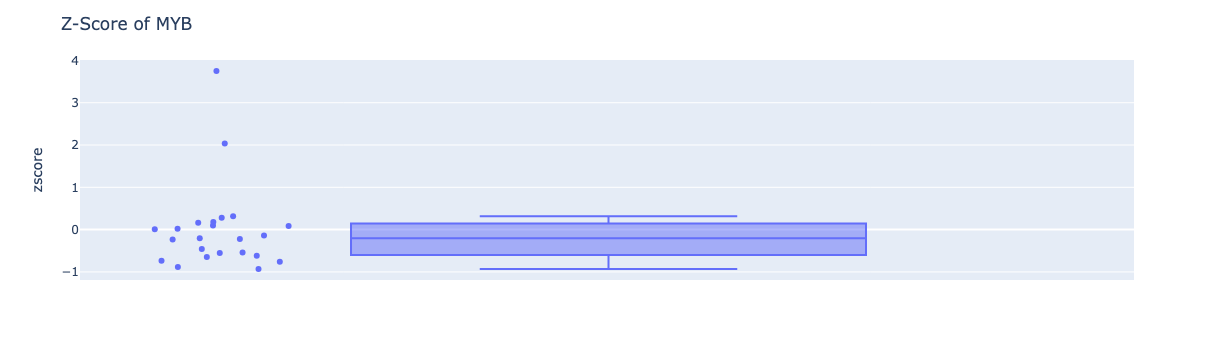

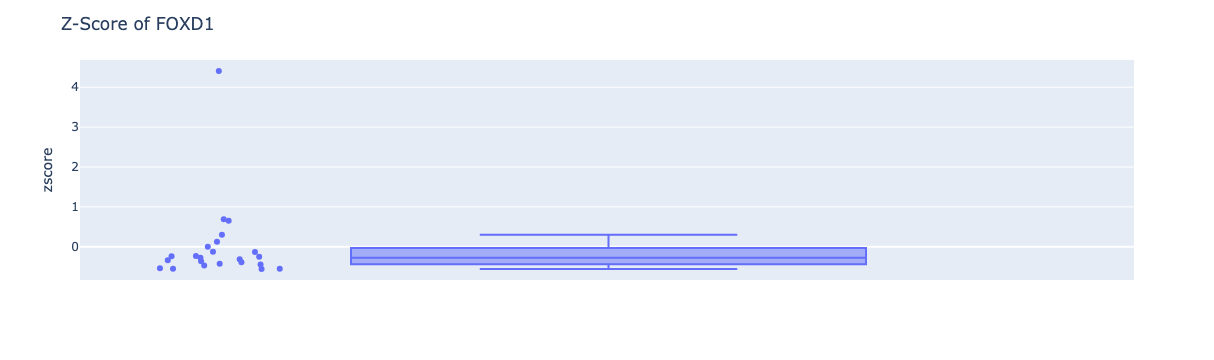

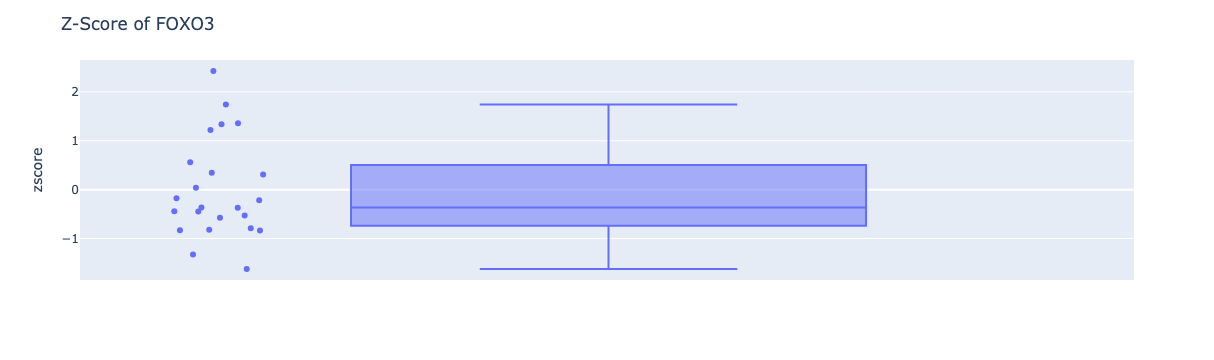

In [67]:
for gene_or_tf in ["MYB", "FOXD1", "FOXO3"]:
    fig = px.box(eopc_zscore_dataframe, y=gene_or_tf, points="all")
    fig.update_layout(
        title = f"Z-Score of {gene_or_tf}",
        yaxis_title = "zscore"
    )
    fig.show()
    
    # fig = px.box(eopc_fpkm_dataframe, y=gene_or_tf, points="all")
    # fig.update_layout(
    #     title = f"FPKM of {gene_or_tf}",
    #     yaxis_title = "FPKM"
    # )
    # fig.show()

### Figure 2E and 2F


In [99]:
luciferase_results = pd.read_excel("./data/final_commentary_supplementary_tables.xlsx", sheet_name="SupplementaryTable1_luciferase_")

In [100]:
luciferase_results.head()

,gene_names,percentage_of_upregulation,replicate
0,EGR1,55.33,Replicate 1
1,EGR1,31.22,Replicate 2
2,EGR1,92.73,Replicate 3
3,EGR1,34.33,Replicate 4
4,TRMT10C,130.77,Replicate 1


In [101]:
def _plot_percentage_upregulation(
    dataframe: pd.DataFrame,
    title_text: str="Percentage Upregulation for Chosen Candidates",
    only_positives: bool=True
):
    if only_positives:
        positives = ["MYB", "CDC20", "RALY", "PRKCB", "EGR1", "TFEB"]
        dataframe = dataframe[dataframe["gene_names"].isin(positives)].reset_index(drop=False)
    
    fig = go.Figure()
    
    # Add all replicates.
    fig = px.strip(
        dataframe, 
        x="gene_names", 
        y="percentage_of_upregulation",
    )
    

    fig.update_xaxes(
        showgrid=True, 
        ticks="outside", 
        tickson="boundaries",
        tickangle=45
    )
    
    fig.update_traces(jitter=0.2)
    fig.update_traces({'marker': {'size': 10, 'color': 'lightgrey', "opacity": 1}})

    # Add average value.
    averages = []
    for idx, gene in enumerate(dataframe.gene_names.unique()):
        avg = np.mean(dataframe[dataframe["gene_names"] == gene]["percentage_of_upregulation"])
        averages.append((gene, avg))
        fig.add_trace(
            go.Scatter(
                x = [gene],
                y = [avg],
                mode="markers",
                marker=dict(
                    color='#e8926c',
                    size=20,
                    line=dict(
                        color='black',
                        width=1
                    ),
                    symbol=17
                ),
                name="Average",
                showlegend=True if idx==0 else False
            )
        )
        
    fig.update_yaxes(
        title = "Percentage of Upregulation",
        dtick = 20
    )

    fig.update_xaxes(
        title="Name of Validated Gene",
    )

    # Add p-values.
    pvalue_dict = {}
    for idx, gene in enumerate(dataframe.gene_names.unique()):
        percentage_upregulated = [value for value in list(dataframe[dataframe["gene_names"] == gene]["percentage_of_upregulation"]) if not np.isnan(value)]
        pval = stats.ttest_1samp(percentage_upregulated, popmean=0, alternative="greater").pvalue
        text = np.round(float(pval), 3)

        pvalue_dict[gene] = f"p-value={text}"

    # Order by average percentage upregulation.
    order = sorted(
        averages,
        key=lambda x: x[1],
        reverse=True
    )
    
    # Order alphabetically.
    order = sorted(
        averages,
        key=lambda x: x[0],
    )

    for idx, gene_and_val in enumerate(order):
        gene, val = gene_and_val
        fig.add_annotation(
            dict(
                font=dict(color="black",size=12),
                x=idx,
                y=1.07,
                showarrow=False,
                text=pvalue_dict[gene],
                textangle=0,
                xref="x",
                yref="paper"
            )
        )

    fig.update_xaxes(
        categoryorder="array",
        categoryarray=[gene_name for gene_name, perc in order]
    )

    # Add horizontal line at 0.
    # fig.add_hline(
    #     y=0, line_dash="dot", opacity=0.8,
    #     annotation_text="No regulation", 
    #     annotation_position="top right"
    # )

    fig.update_layout(
        title_text=title_text
    )

    fig.update_layout(
        yaxis = {
            "ticksuffix": "%"
        }
    )
    
    fig.update_layout(
        plot_bgcolor='white'
    )

    fig.update_xaxes(
        mirror=True,
        ticks='inside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey',
        linewidth=1
    )

    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey',
        linewidth=1
    )
    
    return fig, order

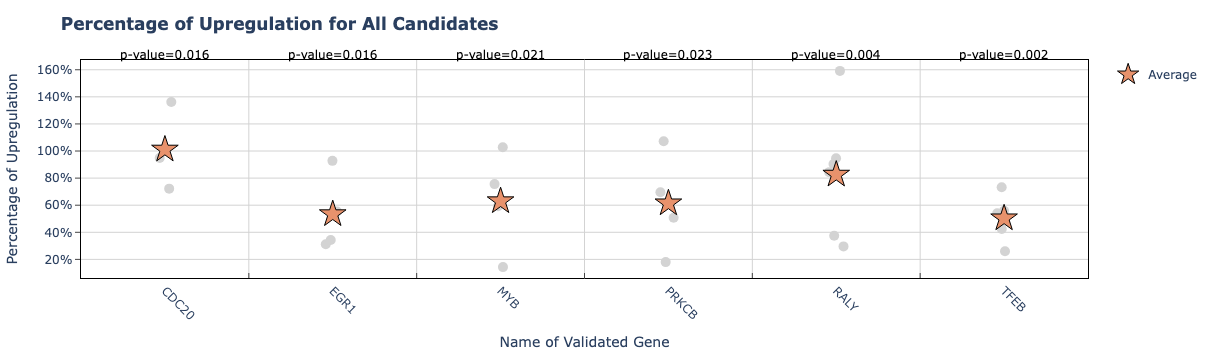

In [102]:
# Plot all candidates.
all_candidates_plot, order = _plot_percentage_upregulation(
    dataframe=luciferase_results,
    title_text="<b>Percentage of Upregulation for All Candidates</b>",
    only_positives=True
)

all_candidates_plot.show()

# Mutation Bias

## Samples with positively validated mutations

- Skin Cancer Positively Validated: EGR1/CDC20/RALY
- Non-Skin Cancer Positively Validated: ANKRD53/MYB/TFEB/PRKCB

|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without Positively Validated pSNV |  2297 | 84     |
| Samples with Positively Validated pSNV   |  9 | 23      |


In [103]:
data = [
    [2297, 84],
    [9, 23]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 1.3457332225113696e-25; odds ratio: 69.88227513227513


## SNVs corresponding to positively validated mutations

|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| SNVs without Positively Validated pSNV |  14008558 | 5393311     |
| SNVs with Positively Validated pSNV   |  9 | 23      |

In [108]:
data = [
    [14008558, 5393311],
    [9, 23]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 2.839009878998305e-07; odds ratio: 6.637786736611744


## pSNVs corresponding to positively validated mutations
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| SNVs without Positively Validated pSNV |  262538 | 103803     |
| SNVs with Positively Validated pSNV   |  9 | 23      |

In [105]:
data = [
    [262538, 103803],
    [9, 23]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 4.1460193031534447e-07; odds ratio: 6.463497629591095


## Samples with TERT C228T
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without TERT C228T |  2225 | 92     |
| Samples with TERT C228T   |  81 | 15      |

In [106]:
data = [
    [2225, 92],
    [81, 15]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 1.2321882454406868e-05; odds ratio: 4.4786634460547505


## Samples with TERT C250T
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without TERT C250T |  2294 | 84     |
| Samples with TERT C250T   |  12 | 23      |

In [112]:
data = [
    [2294, 84],
    [12, 23]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 3.611198878974085e-24; odds ratio: 52.34325396825397


## SNVs with TERT C228T
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without TERT C228T |  14008486 | 5393319     |
| Samples with TERT C228T   |  81 | 15      |

In [115]:
data = [
    [14008486, 5393319],
    [81, 15]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 0.006169531661730057; odds ratio: 0.48099585321655813


## SNVs with TERT C250T
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without TERT C250T |  14008555 | 5393311     |
| Samples with TERT C250T   |  12 | 23      |

In [116]:
data = [
    [14008555, 5393311],
    [12, 23]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 3.3605769859454102e-06; odds ratio: 4.978338986323367


## pSNVs with TERT C228T
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without TERT C228T |  262466 | 103811     |
| Samples with TERT C228T   |  81 | 15      |

In [117]:
data = [
    [262466, 103811],
    [81, 15]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 0.004491945462969029; odds ratio: 0.4682048608992767


## pSNVs with TERT C250T
|  | Non-skin Cancer Samples | Skin Cancer Samples |
|-------|-----|---------|
| Samples without TERT C250T |  262535 | 103803     |
| Samples with TERT C250T   |  12 | 23      |

In [119]:
data = [
    [262535, 103803],
    [12, 23]
]

odds_ratio, p_value = stats.fisher_exact(data)

print(f"p-value: {p_value}; odds ratio: {odds_ratio}")

p-value: 4.807239117547697e-06; odds ratio: 4.84756782880392
